In [99]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Loading data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
img_before_binarize = np.array(train_X[0])

In [100]:
threshold = 100

def biniarize_data(image):
    image[image >= threshold] = 100
    image[image < threshold] = 0

biniarize_data(train_X)

Text(0.5, 0, 'Before Binarizing')

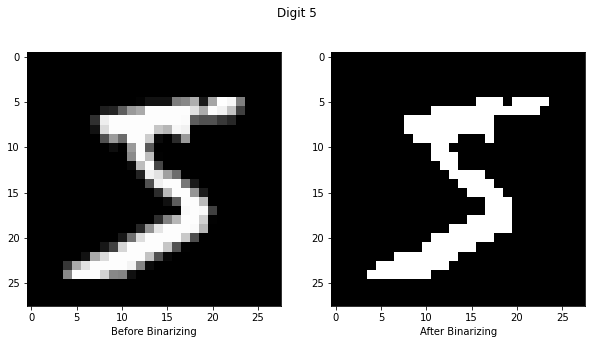

In [135]:
fig = plt.figure(figsize=(10,5))
fig.suptitle("Digit 5")
plt.subplot(1,2, 2)
plt.imshow(train_X[0], cmap="gray")
plt.xlabel("After Binarizing")
plt.subplot(1,2, 1)
plt.imshow(img_before_binarize, cmap="gray")
plt.xlabel("Before Binarizing")

In [43]:
n = 10000
idx = np.random.choice(np.arange(train_X.shape[0]), size=n)
sample_X = train_X[idx]
sample_Y = train_Y[idx]

In [254]:
# Size of grid to split the image into
x_grid_size = 4
y_grid_size = 4

def slice_array(data, x_size, y_size):
  # Todo make sure we can split the data correctly without raising an error
  ystep = data.shape[0] // x_size
  xstep = data.shape[1] // y_size
  temp = []
  for i in range(0, data.shape[0], ystep):
    for j in range(0, data.shape[1], xstep):
      arr = np.array(data[i:i+ystep, j:j+xstep])
      temp.append(arr)
  return np.array(temp)

In [211]:
def centroid(image):
    cen_sum = image.sum()
    if cen_sum == 0:
        return 0, 0
    
    x_sum = y_sum = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            x_sum += x * image[y][x]
            y_sum += y * image[y][x]
    
    centroid_x = x_sum / cen_sum
    centroid_y = y_sum / cen_sum
    return centroid_x, centroid_y

def transform_feature(data):
    # Data is N x 28 x 28
    centroids = []
    for i in range(data.shape[0]):
    # Each sample
        sliced = slice_array(data[i],x_grid_size, y_grid_size)
        local_centroids = []
        for im in sliced:
            x,y = centroid(im)
            local_centroids.extend([x,y])
        centroids.append(local_centroids)
    return np.array(centroids)

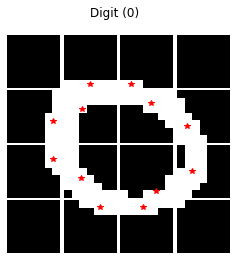

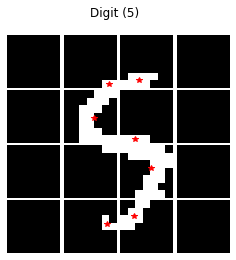

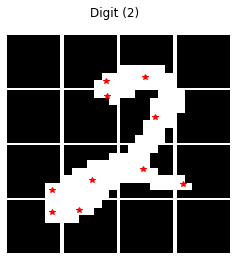

In [206]:
# Plotting an example
#plt.figure(figsize = (4,4))
#plt.imshow(sample_X[0], cmap="gray")
#plt.axis('off')

# Plotting an example from our data after transforming the data
# A visualization of how the centroid is calculated for each batch of the image
def split_and_show(n, x_size, y_size):
    fig = plt.figure(figsize = (4,4))
    img = slice_array(sample_X[n],x_size,y_size)
    for i in range(x_size*y_size):
        plt.subplot(x_size,y_size,i+1)
        x, y = centroid(img[i])
        if x != 0 and y != 0:
            plt.plot(x,y, 'r*')
        plt.imshow(img[i], cmap="gray")
        plt.axis('off')
    plt.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.suptitle("Digit ({})".format(sample_Y[n]))
    
split_and_show(4,4,4)
split_and_show(1,4,4)
split_and_show(6,4,4)

In [302]:
model_results = pd.DataFrame(columns=["n", "grid", "K","Acc"])

In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def build_model(k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X_trans,sample_Y)
    predicted = model.predict(test_X_trans)
    accuracy = accuracy_score(test_Y, predicted)
    return accuracy

#(X, y)
grid = [[2,4], [4,2] , [4,4], [7,7]]
n = [10000, 20000, 60000]
for sampleSize in n:
    idx = np.random.choice(np.arange(train_X.shape[0]), size=sampleSize)
    sample_X = train_X[idx]
    sample_Y = train_Y[idx]
    for i in grid:
        test_X_trans = transform_feature(test_X)
        train_X_trans = transform_feature(sample_X)
        x_grid_size = i[0]
        y_grid_size = i[1]
        for j in range(2,8):
            acc = build_model(j)
            model_results = model_results.append({"n" : sampleSize, "grid": i, "K" : j, "Acc" : acc}, ignore_index=True)

# Gap

In [335]:
model_results.to_csv("results.csv")
hist_10k = model_results[model_results.n == 10000]
hist_20k = model_results[model_results.n == 20000]
hist_60k = model_results[model_results.n == 60000]

In [333]:
print(hist_10k["grid"])
#r = [4,4]
hist_10k_4x4 = hist_10k[hist_10k.grid == r]
print(hist_10k_2x2)
#plt.plot(hist_10000_7x7.K, hist_10000_7x7.Acc)
#plt.ylabel("Accuracy")
#plt.xlabel("K")
#plt.title("10000 Sample")

0     [2, 4]
1     [2, 4]
2     [2, 4]
3     [2, 4]
4     [2, 4]
5     [2, 4]
6     [4, 2]
7     [4, 2]
8     [4, 2]
9     [4, 2]
10    [4, 2]
11    [4, 2]
12    [4, 4]
13    [4, 4]
14    [4, 4]
15    [4, 4]
16    [4, 4]
17    [4, 4]
18    [7, 7]
19    [7, 7]
20    [7, 7]
21    [7, 7]
22    [7, 7]
23    [7, 7]
Name: grid, dtype: object


ValueError: ('Lengths must match to compare', (24,), (2,))